# Tank Blending

Create a dynamic model of concentration and temperature based on a physics-based derivation from species and energy balance equations. A mixing tank has a liquid inlet stream and outlet stream. The tank is well mixed so the concentration and temperature are assumed to be the same throughout the reactor.

<img src="../pictures/mixer_schematic.png" width="500">

Start with the species and energy balance equations and derive the dynamic concentration and temperature response. Develop the concentration response and then add the temperature response. Assume a constant volume V of 100 m3 and an inlet flow rate $\dot{V}$ or q of 100 m3/hr.

### Solution
The first objective is to predict the concentration of A over a simulation time horizon. A species balance is created by relating the accumulation, inlet, and outlet terms of the number of moles n of species A. The accumulation of A, d(nA)/dt, in a control volume is calculated by inlet, outlet, reaction generation, and reaction consumption rates.

$$\frac{dn_A}{dt} = \sum \dot n_{A_{in}} - \sum \dot n_{A_{out}} + \sum \dot n_{A_{gen}} - \sum \dot n_{A_{cons}}$$

The molar amount, nA is often measured as a concentration, cA. In this application there are no reaction terms so the species balance can be simplified.

$$\frac{dc_A V}{dt} = c_{A_{in}} \dot V_{in} - c_{A_{out}} \dot V_{out}$$

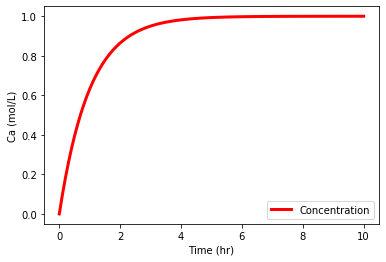

In [7]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define mixing model
def mixer(x,t,Tf,Caf):

    # Inputs (2):
    Ca = x[0]

    # Parameters:
    q = 100
    V = 100

    # Calculate concentration derivative
    dCadt = q/V * (Caf - Ca)

    return dCadt

# Initial Condition
Ca0 = 0.0
Tf = 300
Caf = 1

# Time span
t = np.linspace(0,10,100)

# Simulate mixer
Ca = odeint(mixer,Ca0,t,args=(Tf,Caf))

# Construct results and save data file
# Column 1 = time
# Column 2 = concentration
data = np.vstack((t,Ca.T)) # vertical stack
data = data.T             # transpose data
np.savetxt('../data/data.txt',data,delimiter=',')

# Plot the results
plt.plot(t,Ca,'r-',linewidth=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Concentration'],loc='best')
plt.xlabel('Time (hr)')
plt.show()

### Add energy balance

An energy balance for this application starts with the balance equation for enthalpy, h. Enthalpy is related to temperature as $m*c_{p}(T-T_{ref})$ where $c_{p}$ is the heat capacity. With a constant reference temperature ($T_{ref}$), this reduces to the following.

$$m\,c_p\frac{dT}{dt} = \sum \dot m_{in} c_p \left( T_{in} - T_{ref} \right) - \sum \dot m_{out} c_p \left( T_{out} - T_{ref} \right) + Q + W_s$$


There is no heat input $Q$, shaft work $W_{s}$, or reaction. Reduce this energy balance by eliminating any terms and simplifying the expression. Implement the additional energy balance equation and simulate a feed temperature change from 350 K to 300 K. The tank fluid is initially at 350 K. The liquid heat capacity is constant and does not depend on the concentration of A.

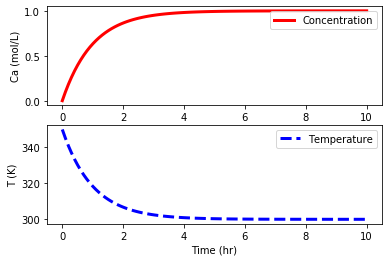

In [10]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define mixing model
def mixer(x,t,Tf,Caf):

    # Inputs (2):
    Ca = x[0]
    T = x[1]

    # Parameters:
    q = 100
    V = 100

    # Calculate concentration derivative
    dCadt = q/V * (Caf - Ca)
    dTdt = q/V * (Tf - T)

    return [dCadt, dTdt]

# Initial Condition
Ca0 = 0.0
T0 = 350
Tf = 300
Caf = 1

# Time span
t = np.linspace(0,10,100)

# Simulate mixer
y = odeint(mixer,[Ca0, T0],t,args=(Tf,Caf))

# Construct results and save data file
# Column 1 = time
# Column 2 = concentration
data = np.vstack((t,y[:,0].T,y[:,1].T)) # vertical stack
data = data.T             # transpose data
np.savetxt('../data/data.txt',data,delimiter=',')

# Plot the results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t,y[:,0],'r-',linewidth=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Concentration'],loc='best')
plt.xlabel('Time (hr)')
plt.subplot(2, 1, 2)
plt.plot(t,y[:,1],'b--',linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'],loc='best')
plt.xlabel('Time (hr)')
plt.show()